In [1]:
%matplotlib inline

""" Ask Kyle
1.  What is the I in the poly_2 model
2. Review the summary information from previous exercises and discuss with kyle"""

In [3]:
import numpy as np
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt

# Set seed for reproducible results
np.random.seed(414)

# Gen toy data
X = np.linspace(0, 15, 1000)
y = 3 * np.sin(X) + np.random.normal(1 + X, .2, 1000)

train_X, train_y = X[:700], y[:700]
test_X, test_y = X[700:], y[700:]

train_df = pd.DataFrame({'X': train_X, 'y': train_y})
test_df = pd.DataFrame({'X': test_X, 'y': test_y})

# Linear Fit
poly_1 = smf.ols(formula='y ~ 1 + X', data=train_df).fit()

# Quadratic Fit
poly_2 = smf.ols(formula='y ~ 1 + X + I(X**2)', data=train_df).fit()  #AK 1

In [4]:
poly_1.summary() #AK 2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     1254.
Date:                Sat, 05 Nov 2016   Prob (F-statistic):          5.52e-158
Time:                        06:23:37   Log-Likelihood:                -1483.4
No. Observations:                 700   AIC:                             2971.
Df Residuals:                     698   BIC:                             2980.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.9959      0.152     13.104      0.000         1.697     2.295
X              0.8896      0.025     35.405      0.000         0.840     0.939
==============================================================================
Omnibus:                      701.108   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.980
Skew:                          -0.259   Prob(JB):                     3.13e-12
Kurtosis:                       1.756   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
poly_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     694.4
Date:                Sat, 05 Nov 2016   Prob (F-statistic):          1.25e-166
Time:                        06:23:37   Log-Likelihood:                -1459.6
No. Observations:                 700   AIC:                             2925.
Df Residuals:                     697   BIC:                             2939.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.1458      0.221     14.261      0.000         2.713     3.579
X              0.2313      0.097      2.382      0.017         0.041     0.422
I(X ** 2)      0.0627      0.009      7.004      0.000         0.045     0.080
==============================================================================
Omnibus:                     1210.467   Durbin-Watson:                   0.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.911
Skew:                          -0.091   Prob(JB):                     1.45e-11
Kurtosis:                       1.705   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

"""calculated as the mean squared error of the model divided by the mean squared error of the residuals. - f stat is lower for poly_2
Would be overfit if it doesn't do well against the test set but is better fit to the training set
"""

In [7]:
# create a mean squared function

def mean_square(test_df, model):
    model = model.predict(test_df) # run the df against the model
    df_model = pd.DataFrame(data = model) # convert the model results to a dataframe
     # calculate the mean squared error
    mean_sq_error = (sum(df_model[0] - test_df['y'])**2)
    
    return(mean_sq_error)
    
p1 = mean_square(test_df, poly_1)
print("Mean squared error for poly_1 = {:.2f}".format(p1))

p2 = mean_square(test_df, poly_2)
print("Mean squared error for poly_2 = {:.2f}".format(p2))


Mean squared error for poly_1 = 32788.77
Mean squared error for poly_2 = 544754.06


""" Mean squared error for the exponential model is greater than for the linear model.  
Although the exponential function better fits the training data it is a less accurate predictor future values."""

In [10]:
test_df.head()


,X,y
0,10.510511,9.113557
1,10.525526,8.798065
2,10.540541,8.931348
3,10.555556,9.047734
4,10.570571,8.659095


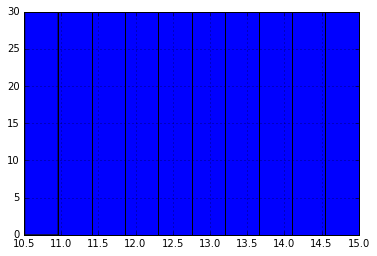

In [11]:
# Graphs of test data X

plt.figure()
p = test_df['X'].hist()
plt.show()



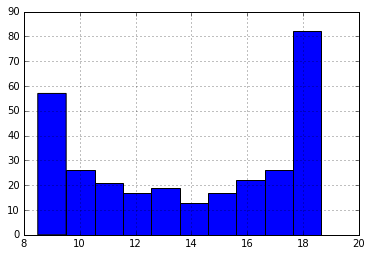

In [12]:
# Graphs of test data X

plt.figure()
p = test_df['y'].hist()
plt.show()

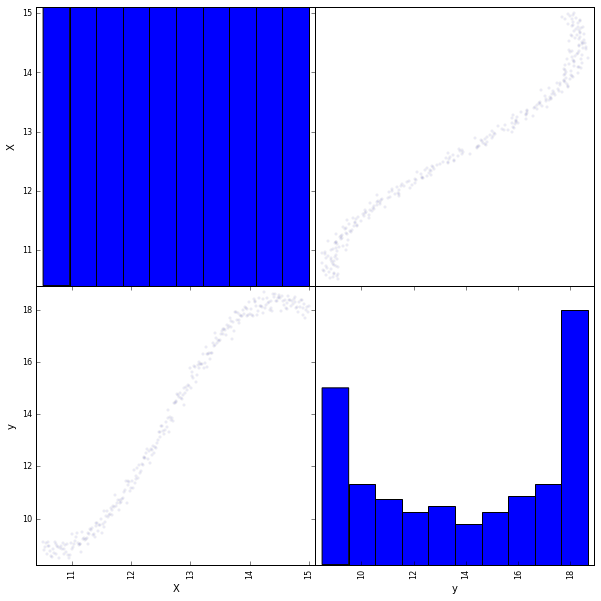

In [13]:
# scatter plot

a = pd.scatter_matrix(test_df, alpha=0.05, figsize=(10,10))

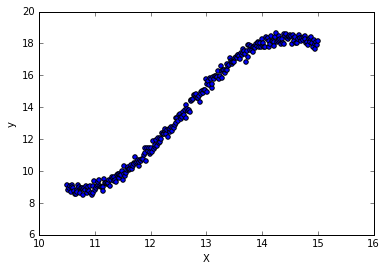

In [14]:
test_df.plot.scatter(x='X', y='y');

In [15]:
# correlation matrix in pandas
test_df.corr()

,X,y
X,1.000000,0.978523
y,0.978523,1.000000
